In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read dataset
df = pd.read_csv("label_daic_extend - label_daic_extend.csv")
df.head()

,Participant_ID,PHQ_8NoInterest,PHQ_8Depressed,PHQ_8Sleep,PHQ_8Tired,PHQ_8Appetite,PHQ_8Failure,PHQ_8Concentrating,PHQ_8Moving,PHQ_8Total,Case,Full_AI,depression
0,300,0,0,1,0,1,0,0,0,2,0,0,0
1,301,0,0,1,1,1,0,0,0,3,1,0,0
2,302,1,1,0,1,0,1,0,0,4,2,0,0
3,303,0,0,0,0,0,0,0,0,0,3,0,0
4,304,0,1,1,2,2,0,0,0,6,4,0,0


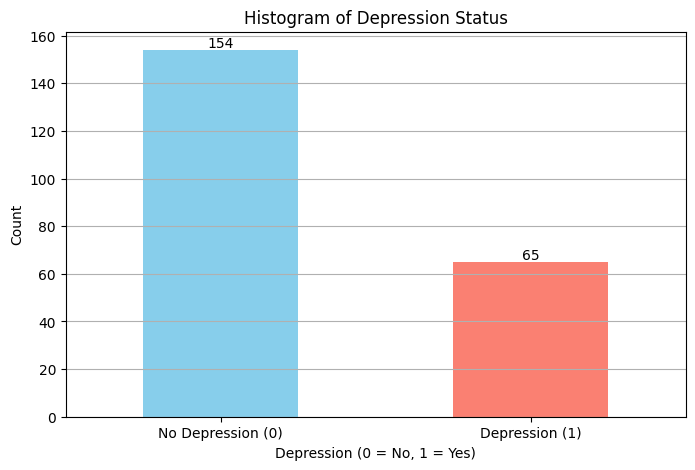

In [4]:
# Histogram of target class
plt.figure(figsize=(8, 5))
counts = df['depression'].value_counts()
bars = counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Adding labels and title
plt.title('Histogram of Depression Status')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Depression (0)', 'Depression (1)'], rotation=0)
plt.grid(axis='y')

# Adding counts on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             int(bar.get_height()), 
             ha='center', 
             va='bottom')

# Show the plot
plt.show()

In [5]:
# Calculating the average scores for each feature according to depression label
average_scores = df.groupby('depression')[[
    'PHQ_8NoInterest', 'PHQ_8Depressed', 'PHQ_8Sleep', 
    'PHQ_8Tired', 'PHQ_8Appetite', 'PHQ_8Failure', 
    'PHQ_8Concentrating', 'PHQ_8Moving', 'PHQ_8Total'
]].mean()

# Display the average scores table
print(average_scores)

            PHQ_8NoInterest  PHQ_8Depressed  PHQ_8Sleep  PHQ_8Tired  \
depression                                                            
0                  0.350649        0.422078    0.571429    0.701299   
1                  1.538462        1.861538    2.215385    2.092308   

            PHQ_8Appetite  PHQ_8Failure  PHQ_8Concentrating  PHQ_8Moving  \
depression                                                                 
0                0.467532      0.461039            0.272727     0.090909   
1                2.030769      1.938462            1.815385     0.969231   

            PHQ_8Total  
depression              
0             3.337662  
1            14.461538  


Distribution of Total PHQ_8 score by label

<Figure size 1000x600 with 0 Axes>

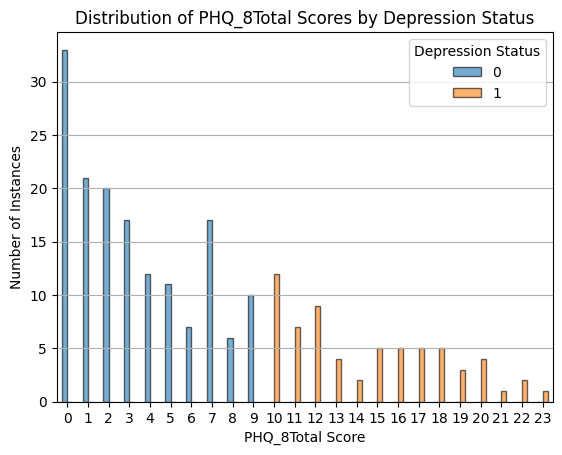

In [6]:
# Calculate counts for each score from 0 to 24 for both classes
score_counts = df.groupby(['PHQ_8Total', 'depression']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting each depression status
score_counts.plot(kind='bar', alpha=0.6, edgecolor='black')

# Adding labels and title
plt.title('Distribution of PHQ_8Total Scores by Depression Status')
plt.xlabel('PHQ_8Total Score')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)  # Rotate x-tick labels for better readability
plt.legend(title='Depression Status')

# Show the plot
plt.grid(axis='y')  # Optional: Add grid for better readability
plt.show()

Distribution of PHQ_8NoInterest score by label

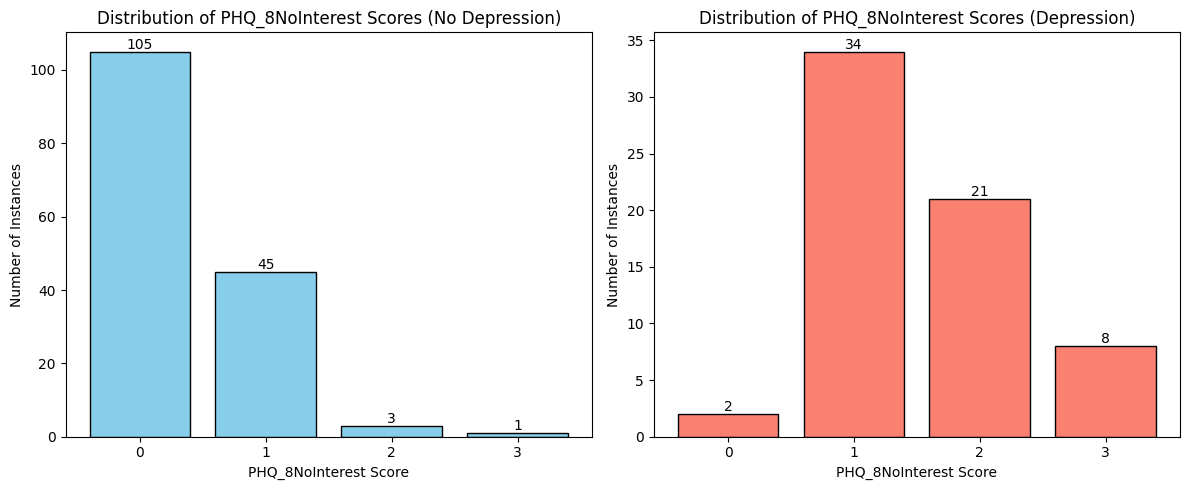

In [7]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8NoInterest'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8NoInterest Scores (No Depression)')
axs[0].set_xlabel('PHQ_8NoInterest Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8NoInterest'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8NoInterest Scores (Depression)')
axs[1].set_xlabel('PHQ_8NoInterest Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Depressed score by label

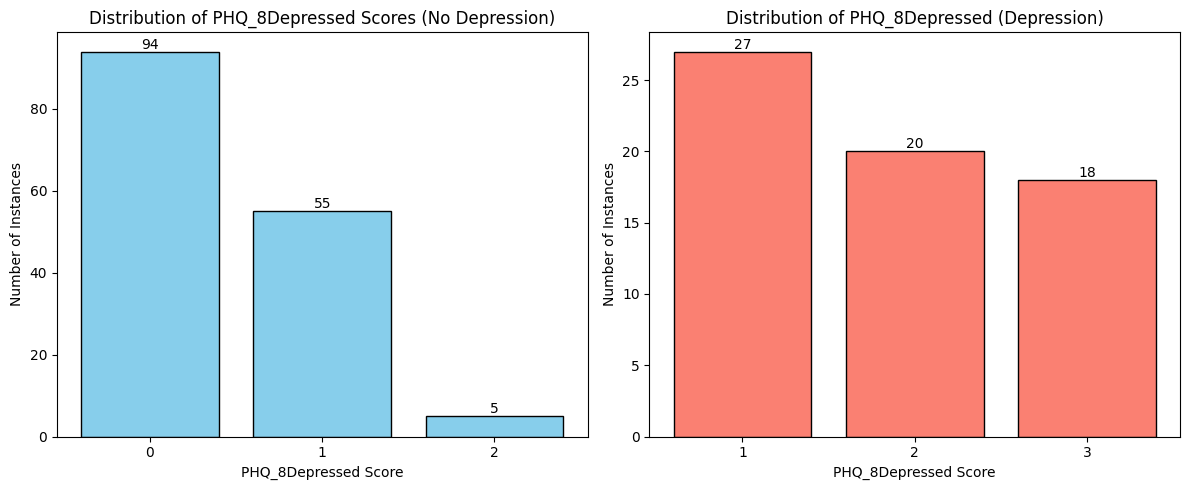

In [8]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Depressed'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Depressed Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Depressed Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Depressed'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Depressed (Depression)')
axs[1].set_xlabel('PHQ_8Depressed Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Sleep score by label

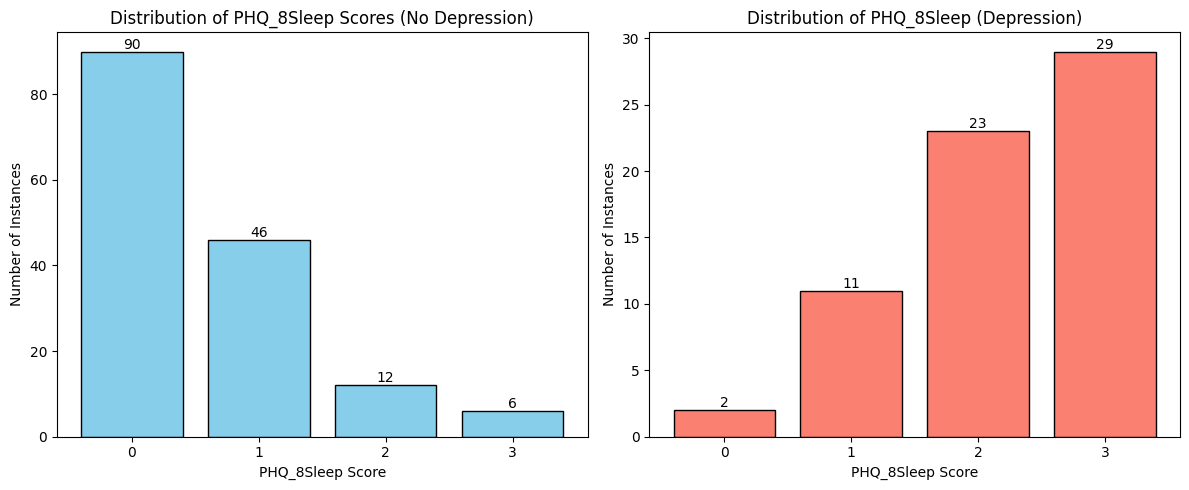

In [9]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Sleep'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Sleep Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Sleep Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Sleep'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Sleep (Depression)')
axs[1].set_xlabel('PHQ_8Sleep Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Tired score by label

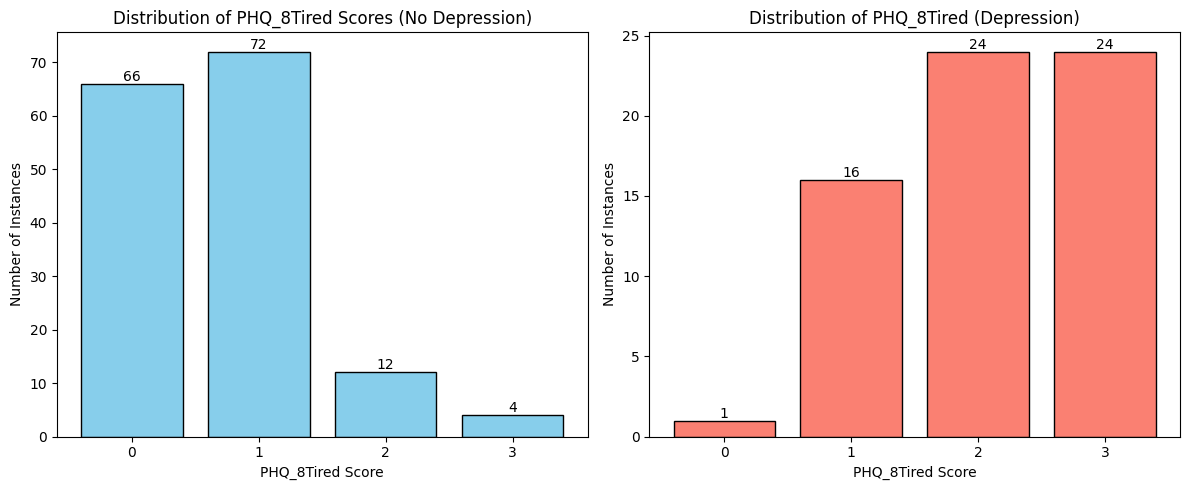

In [10]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Tired'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Tired Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Tired Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Tired'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Tired (Depression)')
axs[1].set_xlabel('PHQ_8Tired Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Appetite score by label

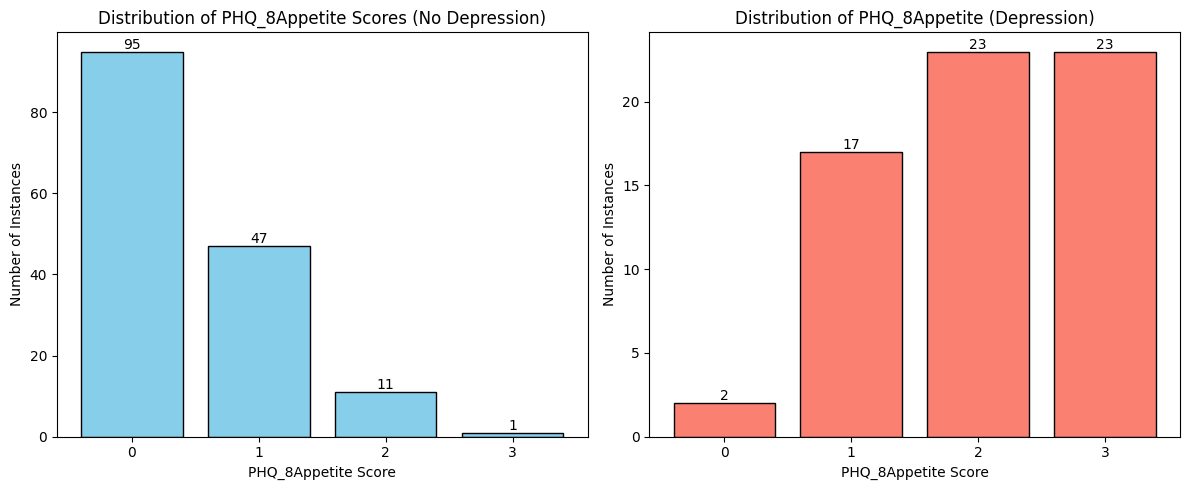

In [11]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Appetite'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Appetite Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Appetite Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Appetite'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Appetite (Depression)')
axs[1].set_xlabel('PHQ_8Appetite Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Failure score by label

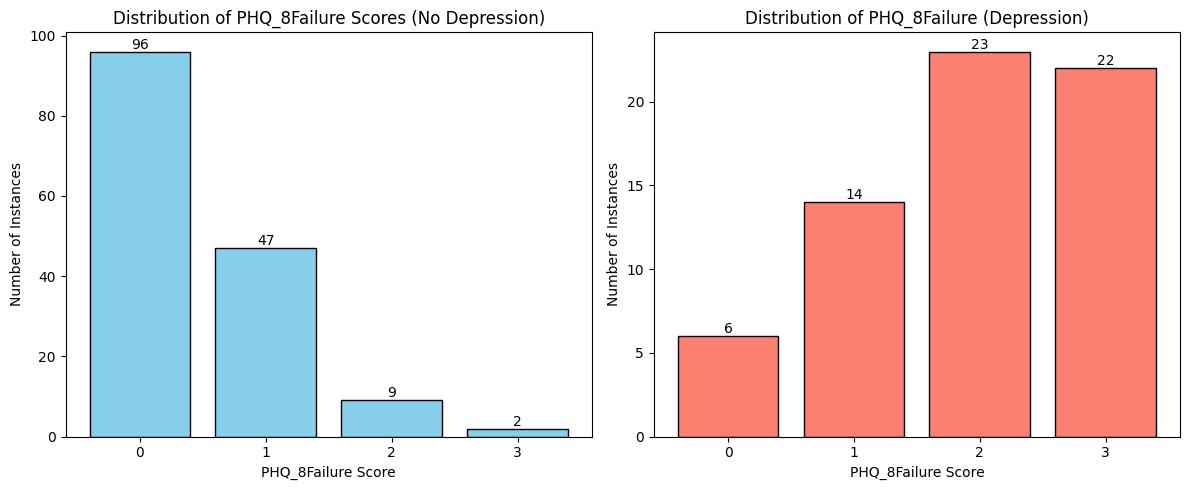

In [12]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Failure'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Failure Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Failure Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Failure'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Failure (Depression)')
axs[1].set_xlabel('PHQ_8Failure Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Concentrating score by label

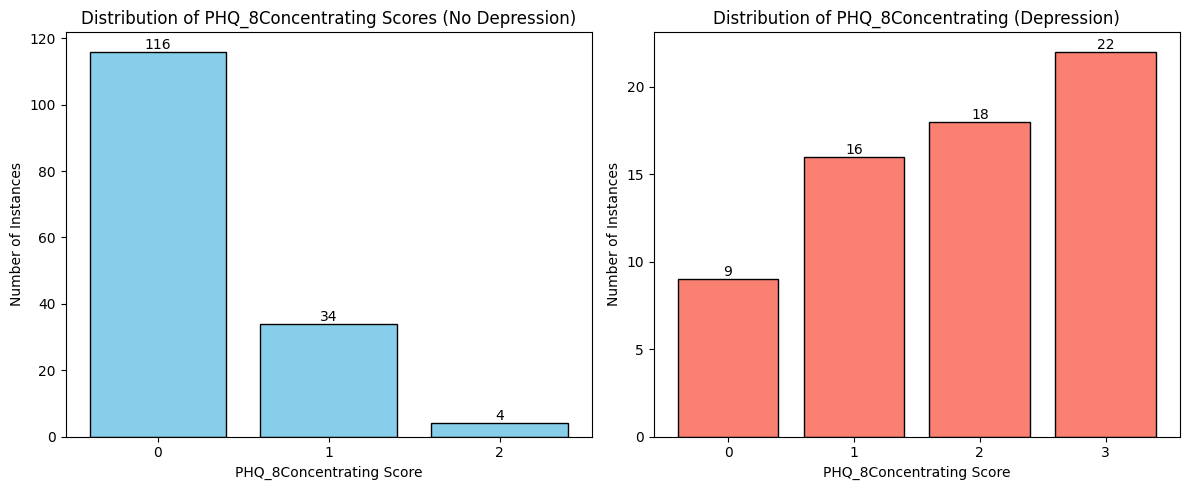

In [13]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Concentrating'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Concentrating Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Concentrating Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Concentrating'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Concentrating (Depression)')
axs[1].set_xlabel('PHQ_8Concentrating Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Distribution of PHQ_8Moving score by label

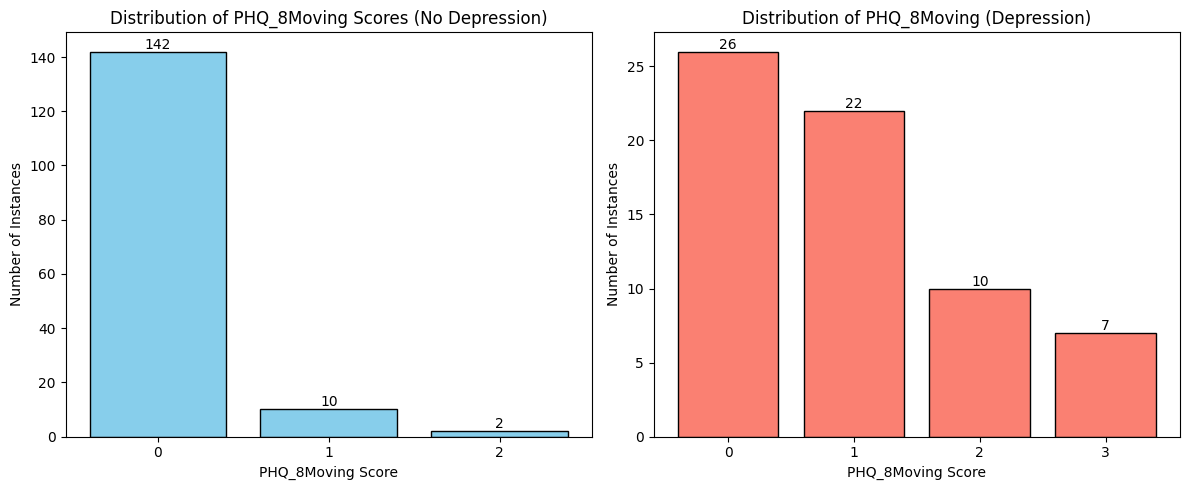

In [14]:
# Set up the figure for two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for No Depression (0)
counts_0 = df[df['depression'] == 0]['PHQ_8Moving'].value_counts().sort_index()
axs[0].bar(counts_0.index, counts_0.values, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of PHQ_8Moving Scores (No Depression)')
axs[0].set_xlabel('PHQ_8Moving Score')
axs[0].set_ylabel('Number of Instances')
axs[0].set_xticks(counts_0.index)

# Adding counts on top of bars for No Depression
for x, count in zip(counts_0.index, counts_0.values):
    axs[0].text(x, count, str(count), ha='center', va='bottom')

# Plot for Depression (1)
counts_1 = df[df['depression'] == 1]['PHQ_8Moving'].value_counts().sort_index()
axs[1].bar(counts_1.index, counts_1.values, color='salmon', edgecolor='black')
axs[1].set_title('Distribution of PHQ_8Moving (Depression)')
axs[1].set_xlabel('PHQ_8Moving Score')
axs[1].set_ylabel('Number of Instances')
axs[1].set_xticks(counts_1.index)

# Adding counts on top of bars for Depression
for x, count in zip(counts_1.index, counts_1.values):
    axs[1].text(x, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()